# Q3: Fourier analysis

## Part 2: Synthesising an instrument

In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt 
import scipy.io.wavfile
from IPython.display import Audio
from matplotlib.widgets import Cursor

We're going to create a set of sin functions. You can specify the amplitudes, frequencies and phases shifts for each of the waves. Try adding more of the harmonics you found when analysing your recordings.

In [2]:
# Samples per second
sample_rate = 44100

# Duration in seconds
duration_s = 5

## Create a list of sine waves to add together 
## Each one has an ampltude, frequency (Hz) and phase (radians)
wave_properties = [
    (0.4, 100.0, 0.0),
    (0.1, 200.0, np.pi/2.0),
    (0.005, 400.0, 0.0),
]

## Create the waveforms for each sine wave
waveforms = []
sample_number = np.arange(duration_s * sample_rate)
for amp,freq,phase in wave_properties:
    waveforms += [amp*np.sin(2 * np.pi * sample_number * freq / sample_rate + phase)]

Now we can plot each of the waves we've created, along with the total sum.

<IPython.core.display.Javascript object>


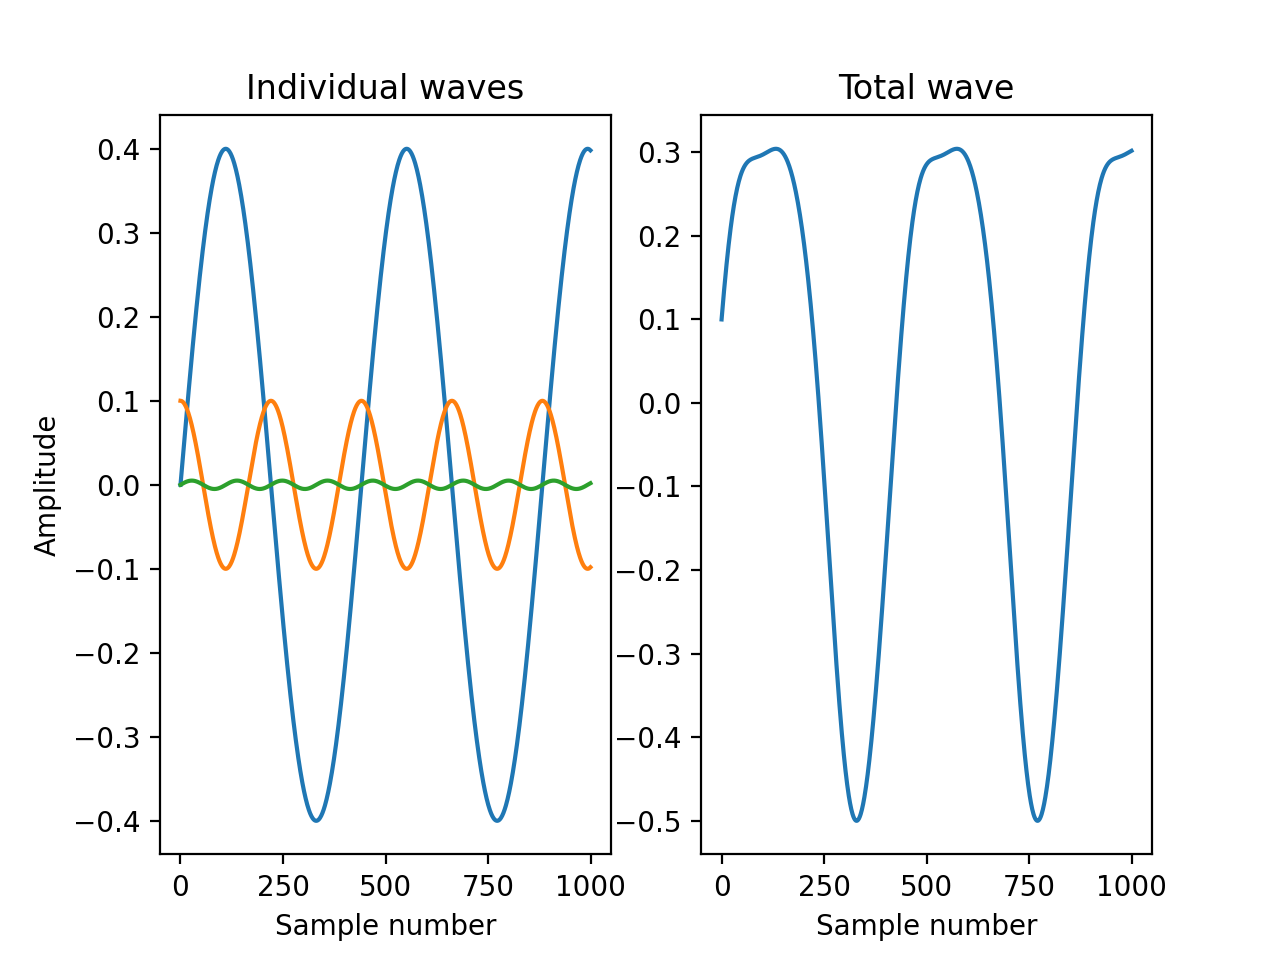

In [3]:
## Plot a restricted range of the samples
first_sample = 0
last_sample  = 1000

total = np.zeros(duration_s * sample_rate)

fig, (ax0, ax1) = plt.subplots(1, 2)
for wave in waveforms:
    total += wave
    x = sample_number[first_sample:last_sample]
    y = wave[first_sample:last_sample]
    ax0.plot(x,y)
ax0.set_xlabel('Sample number')
ax0.set_ylabel('Amplitude')
ax0.set_title('Individual waves')


x = sample_number[first_sample:last_sample]
y = total[first_sample:last_sample]
ax1.plot(x,y)
ax1.set_xlabel('Sample number')
ax1.set_title('Total wave')

# save the plot
plt.savefig('part2_sine_waves.pdf')

## Save the sample and see what it sounds like!
scipy.io.wavfile.write("waveform_unwindowed.wav", sample_rate, total)

In [4]:
## We can also play it directly in the notebook
Audio(total, rate=sample_rate)  

To make the wave sound more like the guitar string, we can multiple it be an envelope function to mimic how it moves when we pluck the string, and as the energy is disipated over time. 

<IPython.core.display.Javascript object>


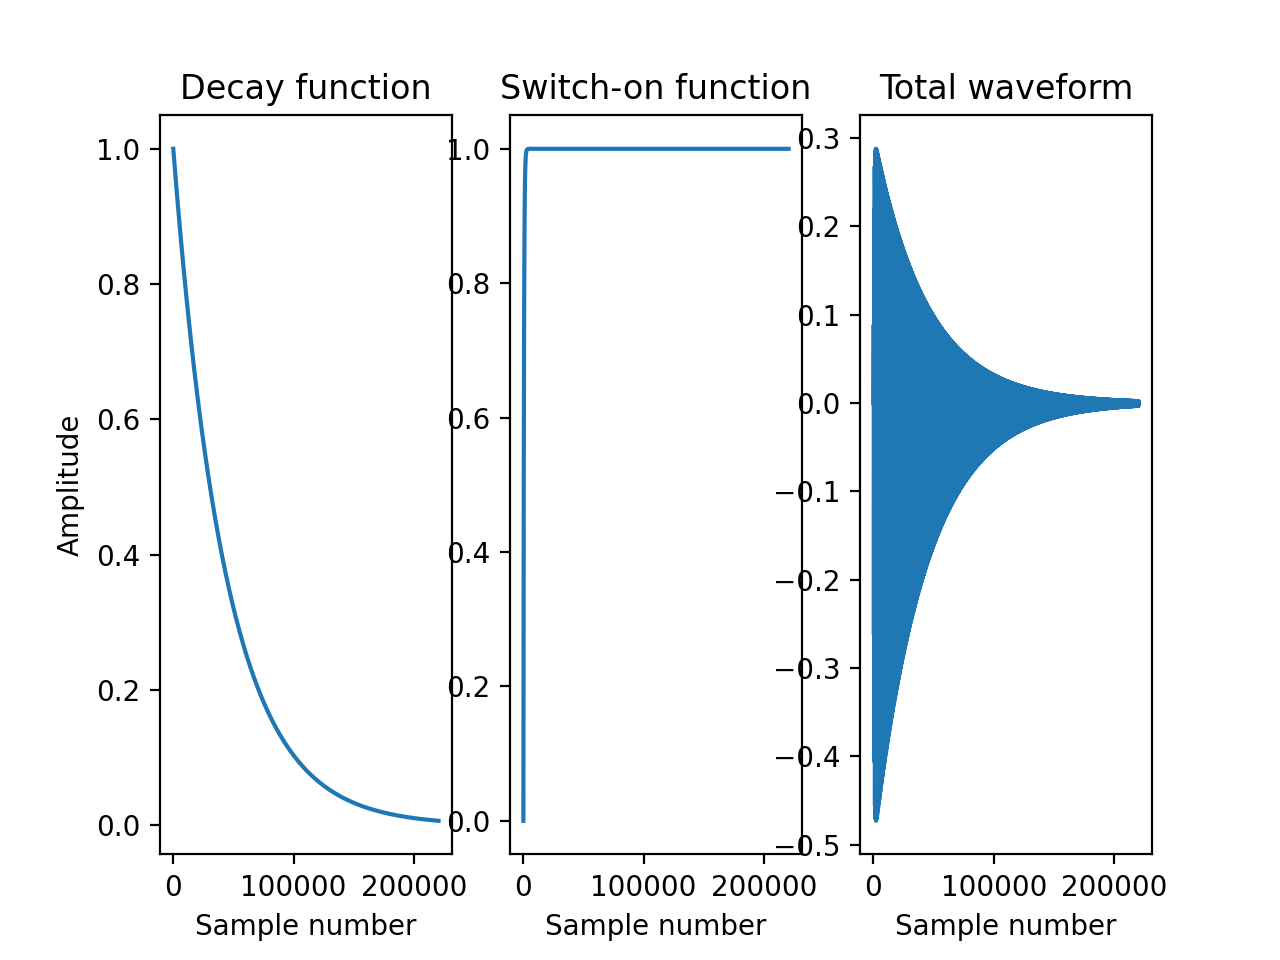

In [5]:
## Lets use an exponential function to model the decay
## and 1-exp to model the pluck

decay_time = 1.0 ## seconds 
decay_shape = np.exp(-sample_number/(decay_time*sample_rate) )

attack_time = 0.01 ## seconds 
attack_shape = 1-np.exp(-sample_number/(attack_time*sample_rate) )

windowed = np.multiply(total,np.multiply(decay_shape,attack_shape))

## We can plot a reduced range if we want to zoom in 
first_sample = 0
last_sample  = len(sample_number)
# first_sample = 0
# last_sample  = 25000

fig, (ax0,ax1,ax2) = plt.subplots(1, 3)
ax0.plot(sample_number[first_sample:last_sample],decay_shape[first_sample:last_sample])
ax0.set_xlabel('Sample number')
ax0.set_ylabel('Amplitude')
ax0.set_title('Decay function')

ax1.plot(sample_number[first_sample:last_sample],attack_shape[first_sample:last_sample])
ax1.set_xlabel('Sample number')
ax1.set_title('Switch-on function')

ax2.plot(sample_number[first_sample:last_sample],windowed[first_sample:last_sample])
ax2.set_xlabel('Sample number')
ax2.set_title('Total waveform')

plt.savefig('part2_total_waveform.pdf')

Now we can save our function as an audio file and listen to it.

In [6]:
## Save the sample and see what it sounds like!
scipy.io.wavfile.write("waveform_windowed.wav", sample_rate, windowed)

## Either open the file above in an audio player or play directly in the notebook
Audio(windowed, rate=sample_rate) 

We can compare the fourier transform of our newly created wave to the transform of our recording. How similar is it?

<IPython.core.display.Javascript object>


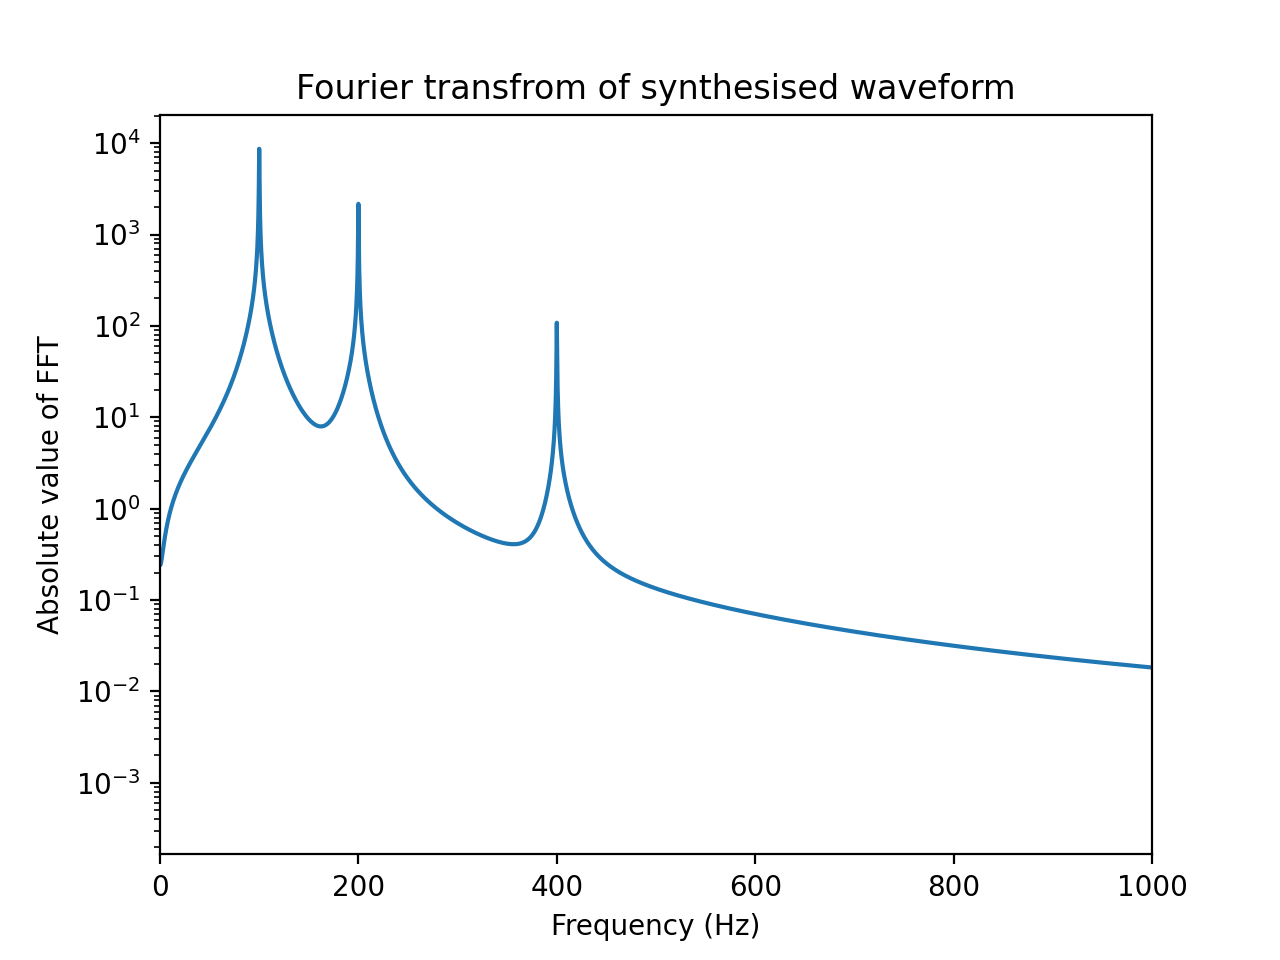

In [7]:
## What does the fourier transform of the waveform look like now?
## Perform a fast fourier transform of the waveform
data_to_transform = windowed
fourier_transform = np.fft.rfft(data_to_transform)

## Take the absolute value
abs_fourier_transform =  np.abs(fourier_transform)

## Create an array with the frequencies for each point in the transform 
freq = np.fft.rfftfreq(data_to_transform.size, d=1./sample_rate)


fig, (ax0) = plt.subplots(1, 1)
ax0.plot(freq,abs_fourier_transform)
ax0.set_xlabel('Frequency (Hz)')
ax0.set_ylabel('Absolute value of FFT')
ax0.set_yscale('log')
ax0.set_title('Fourier transfrom of synthesised waveform')

## Pick which range of frequencies to plot
ax0.set_xlim([0, 1000])
cursor = Cursor(ax0, color='green', linewidth=1)
plt.savefig('part2_spectrum.pdf')

# plt.show()